In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3604,9313-CDOGY,Male,0,Yes,Yes,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.60,717.3,No
6276,5003-OKNNK,Female,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.35,335.95,No
1759,2243-FNMMI,Male,0,No,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,415.4,No
1360,3793-MMFUH,Female,1,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.05,1290,Yes
478,0306-JAELE,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,96.10,453.4,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


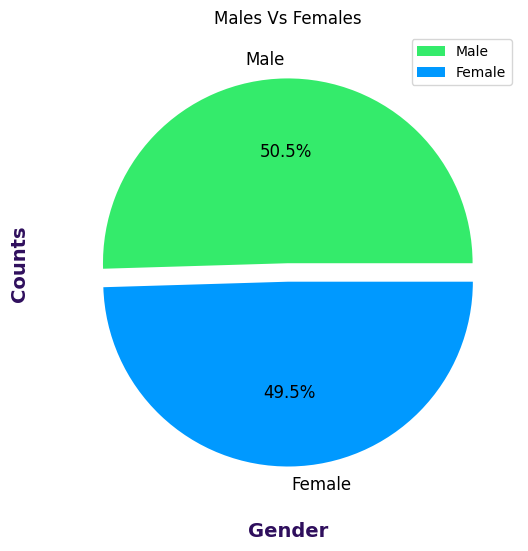

In [10]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [12]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [15]:
df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


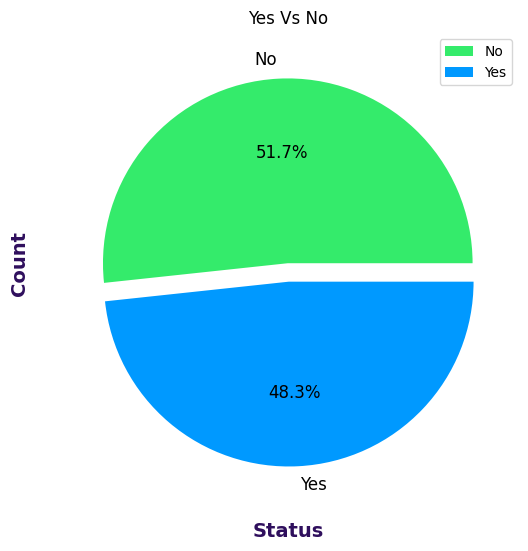

In [17]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["Partner"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Yes Vs No')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [19]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})


In [20]:
df['Dependents'].value_counts()


,count
Dependents,
No,4933
Yes,2110


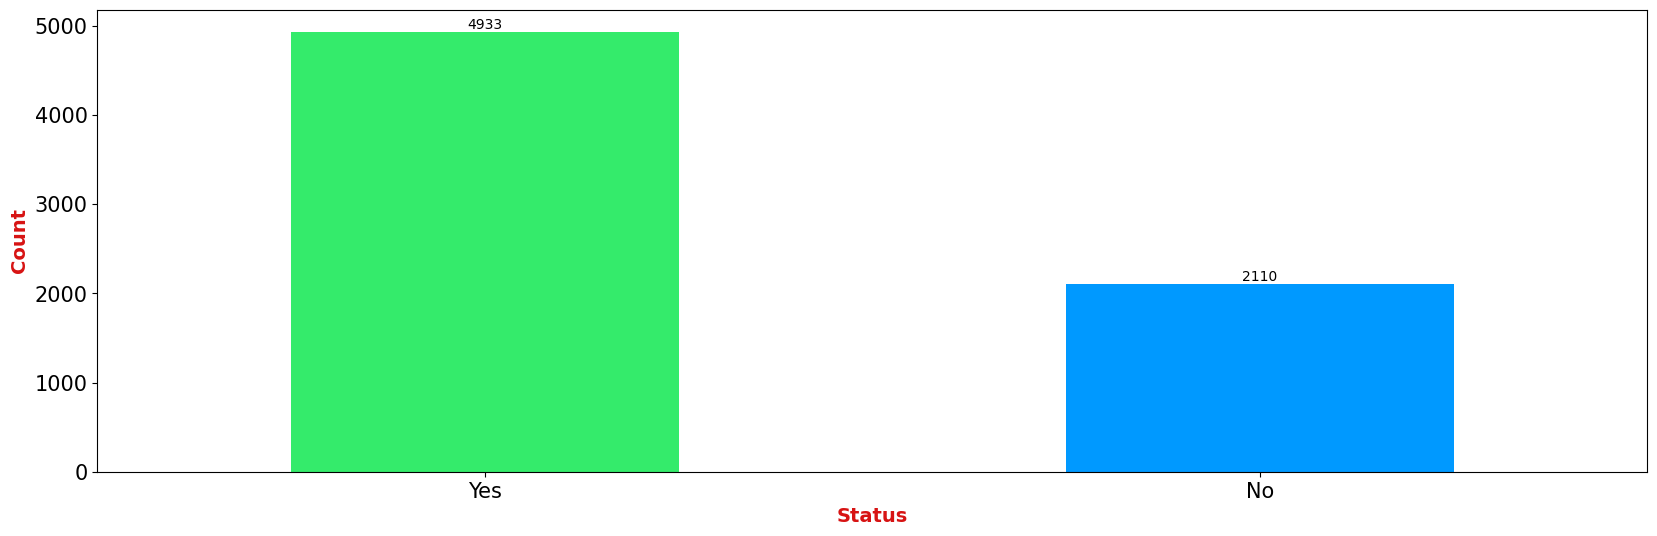

In [21]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["Dependents"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

In [22]:
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})


In [23]:
df['PhoneService'].value_counts()


,count
PhoneService,
Yes,6361
No,682


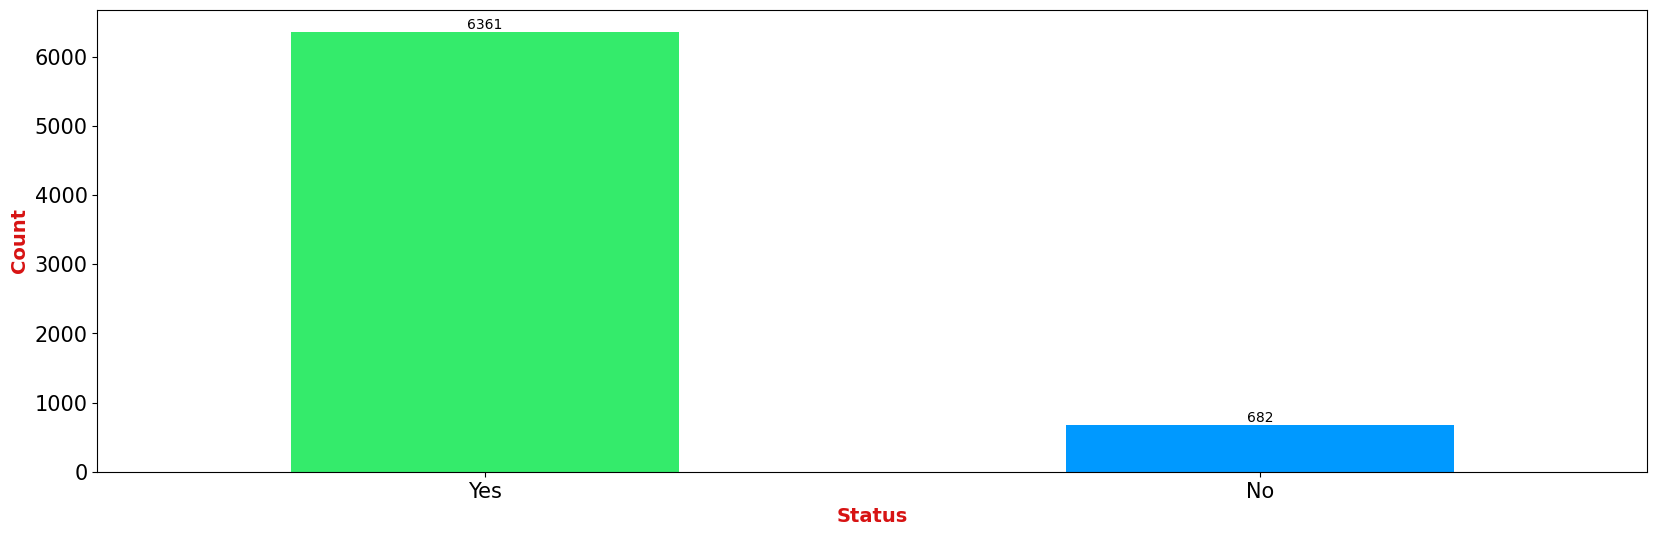

In [24]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["PhoneService"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

In [26]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})


In [28]:
df['MultipleLines'].value_counts()


,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


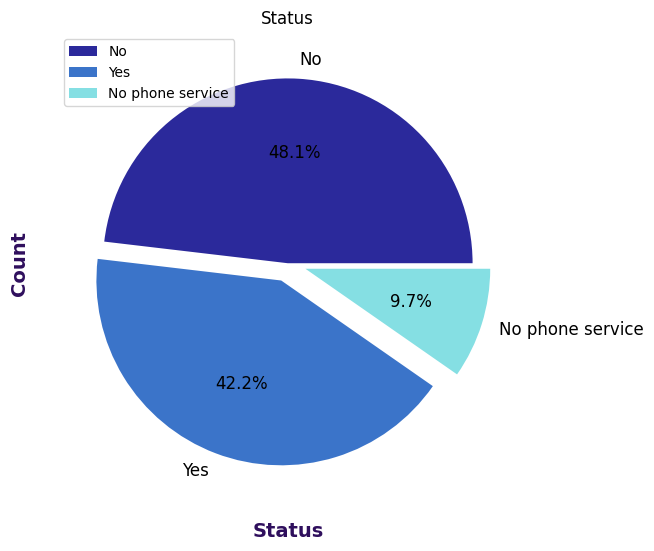

In [30]:
colors = ["#2B299B" , "#3B74C9" , "#85DFE3"]

plt.figure(figsize = (20, 6))

counts = df["MultipleLines"].value_counts()
explode = (0, 0.1  , 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [32]:
mapping_dict = {'No phone service': 0, 'No': 0, 'Yes': 1}

df['MultipleLines'] = df['MultipleLines'].map(mapping_dict)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df.InternetService = le.fit_transform(df.InternetService)

In [35]:
df.Contract = le.fit_transform(df.Contract)


In [36]:
df.PaymentMethod = le.fit_transform(df.PaymentMethod)


In [37]:
df.sample(4)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
72,0,1,NaN,1,64,NaN,NaN,1,Yes,No,Yes,Yes,Yes,Yes,2,Yes,0,111.60,7099,No
6778,1,0,NaN,1,72,NaN,NaN,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,Yes,3,19.75,1567,No
4136,0,0,NaN,0,47,NaN,NaN,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,0,19.90,942.95,No
396,0,1,NaN,0,33,NaN,NaN,1,Yes,No,Yes,Yes,Yes,Yes,0,Yes,0,109.90,3694.7,No


In [38]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [39]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [40]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()


np.int64(11)

In [41]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,NaN,1,0,NaN,NaN,0,1,0,1,1,1,0,2,1,0,52.55,,0
753,0,0,NaN,1,0,NaN,NaN,2,0,0,0,0,0,0,2,0,3,20.25,,0
936,1,0,NaN,1,0,NaN,NaN,0,1,1,1,0,1,1,2,0,3,80.85,,0
1082,0,0,NaN,1,0,NaN,NaN,2,0,0,0,0,0,0,2,0,3,25.75,,0
1340,1,0,NaN,1,0,NaN,NaN,0,1,1,1,1,1,0,2,0,1,56.05,,0
3331,0,0,NaN,1,0,NaN,NaN,2,0,0,0,0,0,0,2,0,3,19.85,,0
3826,0,0,NaN,1,0,NaN,NaN,2,0,0,0,0,0,0,2,0,3,25.35,,0
4380,1,0,NaN,1,0,NaN,NaN,2,0,0,0,0,0,0,2,0,3,20.00,,0
5218,0,0,NaN,1,0,NaN,NaN,2,0,0,0,0,0,0,1,1,3,19.70,,0
6670,1,0,NaN,1,0,NaN,NaN,0,0,1,1,1,1,0,2,0,3,73.35,,0


In [43]:
df.shape


(7043, 20)

In [45]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [46]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [47]:
df[cols_to_scale ].sample(5)

,tenure,MonthlyCharges,TotalCharges
3740,0.014085,0.531343,0.013495
6813,0.887324,0.294527,0.361032
807,0.985915,0.898507,0.876667
483,1.000000,0.898010,0.921417
1152,0.084507,0.364179,0.040572


In [48]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
gender,int64,0,0.000000,2,7032
SeniorCitizen,int64,0,0.000000,2,7032
Partner,float64,7032,1.000000,0,0
Dependents,int64,0,0.000000,2,7032
tenure,float64,0,0.000000,72,7032
PhoneService,float64,7032,1.000000,0,0
MultipleLines,float64,7032,1.000000,0,0
InternetService,int64,0,0.000000,3,7032
OnlineSecurity,int64,0,0.000000,2,7032
OnlineBackup,int64,0,0.000000,2,7032


In [50]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [52]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3301,1,1,NaN,0,0.000000,NaN,NaN,1,0,0,0,0,0,0,0,1,2,0.510945,0.005862
3710,0,0,NaN,1,0.126761,NaN,NaN,2,0,0,0,0,0,0,1,0,3,0.021891,0.025802
5418,0,1,NaN,0,0.239437,NaN,NaN,1,0,1,0,0,0,0,0,1,1,0.619900,0.160726


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [56]:
X_train.shape

(5625, 19)

In [58]:
X_test.shape


(1407, 19)

In [59]:
import tensorflow as tf
from tensorflow import keras

In [60]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7424 - loss: nan
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7424 - loss: nan
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7453 - loss: nan
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: nan
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: nan
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: nan
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: nan
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7371 - loss: nan
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7329 - loss: nan
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: nan
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: nan
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7409 -

In [62]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7260 - loss: nan


[nan, 0.7100213170051575]

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

In [64]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       999
           1       0.00      0.00      0.00       408

    accuracy                           0.71      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.50      0.71      0.59      1407



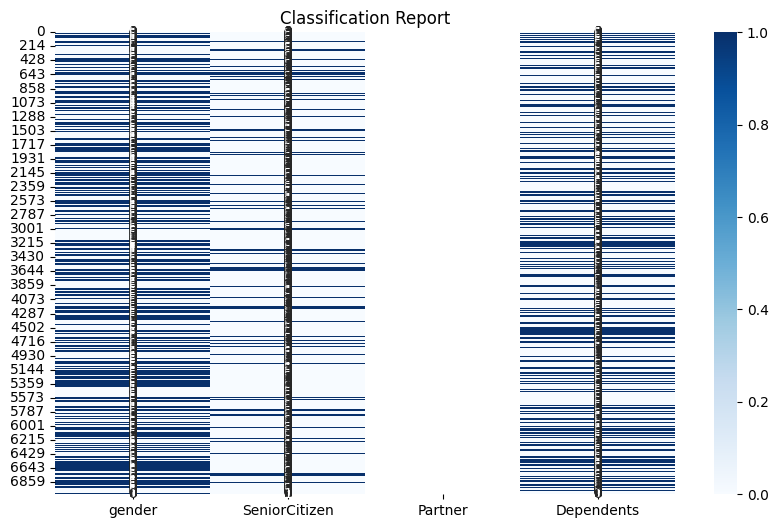

In [66]:
report = classification_report(y_test, y_pred, output_dict=True)
rep = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :4], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [67]:
# Extract metrics for each class
classes = [str(key) for key in range(len(report) - 3)]  # Extract class labels
precision = [report[key]['precision'] for key in classes]
recall = [report[key]['recall'] for key in classes]
f1_score = [report[key]['f1-score'] for key in classes]

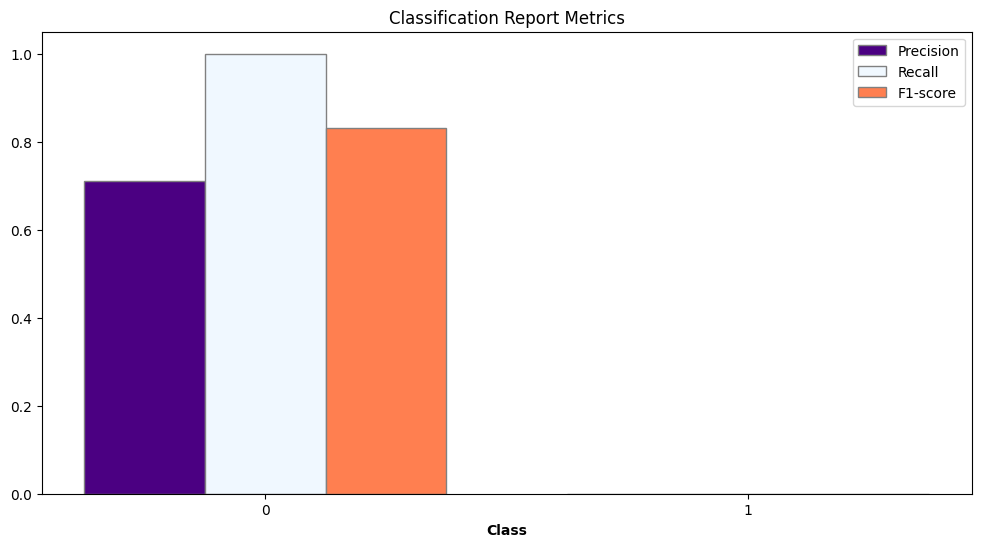

In [68]:
# Plotting the metrics using a bar chart
plt.figure(figsize=(12, 6))
barWidth = 0.25
r1 = range(len(classes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='#4b0082', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='#f0f8ff', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='#ff7f50', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.legend()
plt.title("Classification Report Metrics")
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

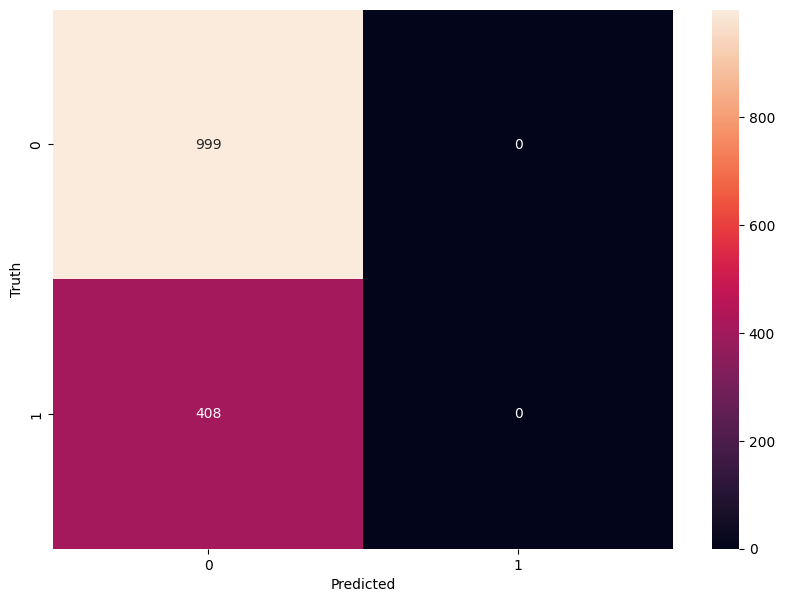

In [69]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')